# The Steps that needs to be taken care of

1. Reading , understanding and visualising the data
2. Preparing the data for modelling (tain-test split, etc)
3. Training the model
4. Residual Analysis 
5. Predictions and evauation on the test set

# Step 1 : Readings and Understanding the data

Lets first import NumPy and Pandas and read the housing dataset

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [111]:
# read data

days = pd.read_csv('day.csv')
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [112]:
days.shape

(730, 16)

In [113]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [114]:
days.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [115]:
# checking for the null values in column data

days.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [116]:
#instant is an index column so we drop it

days.drop(['instant'],axis=1,inplace=True)
days.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#  Visualising the Data

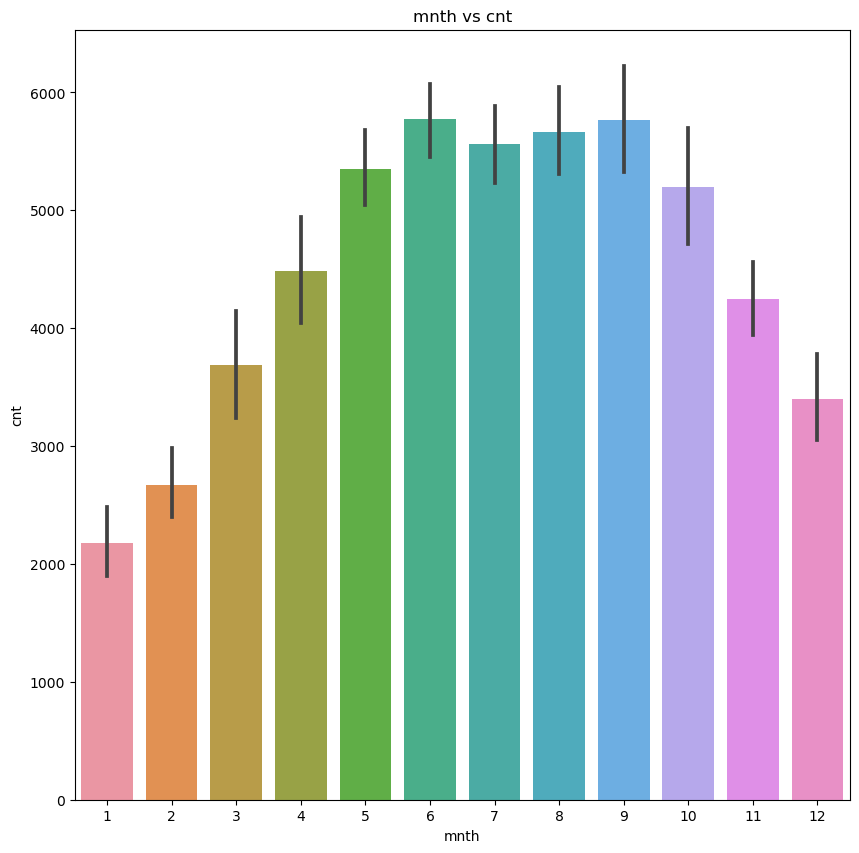

In [117]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="mnth", y="cnt",data=days)
plt.title('mnth vs cnt')

plt.show()

## Observation : The no. of users is the lowest in January and the highest in June. May, June, July, August, September and October also have the higher number of users.

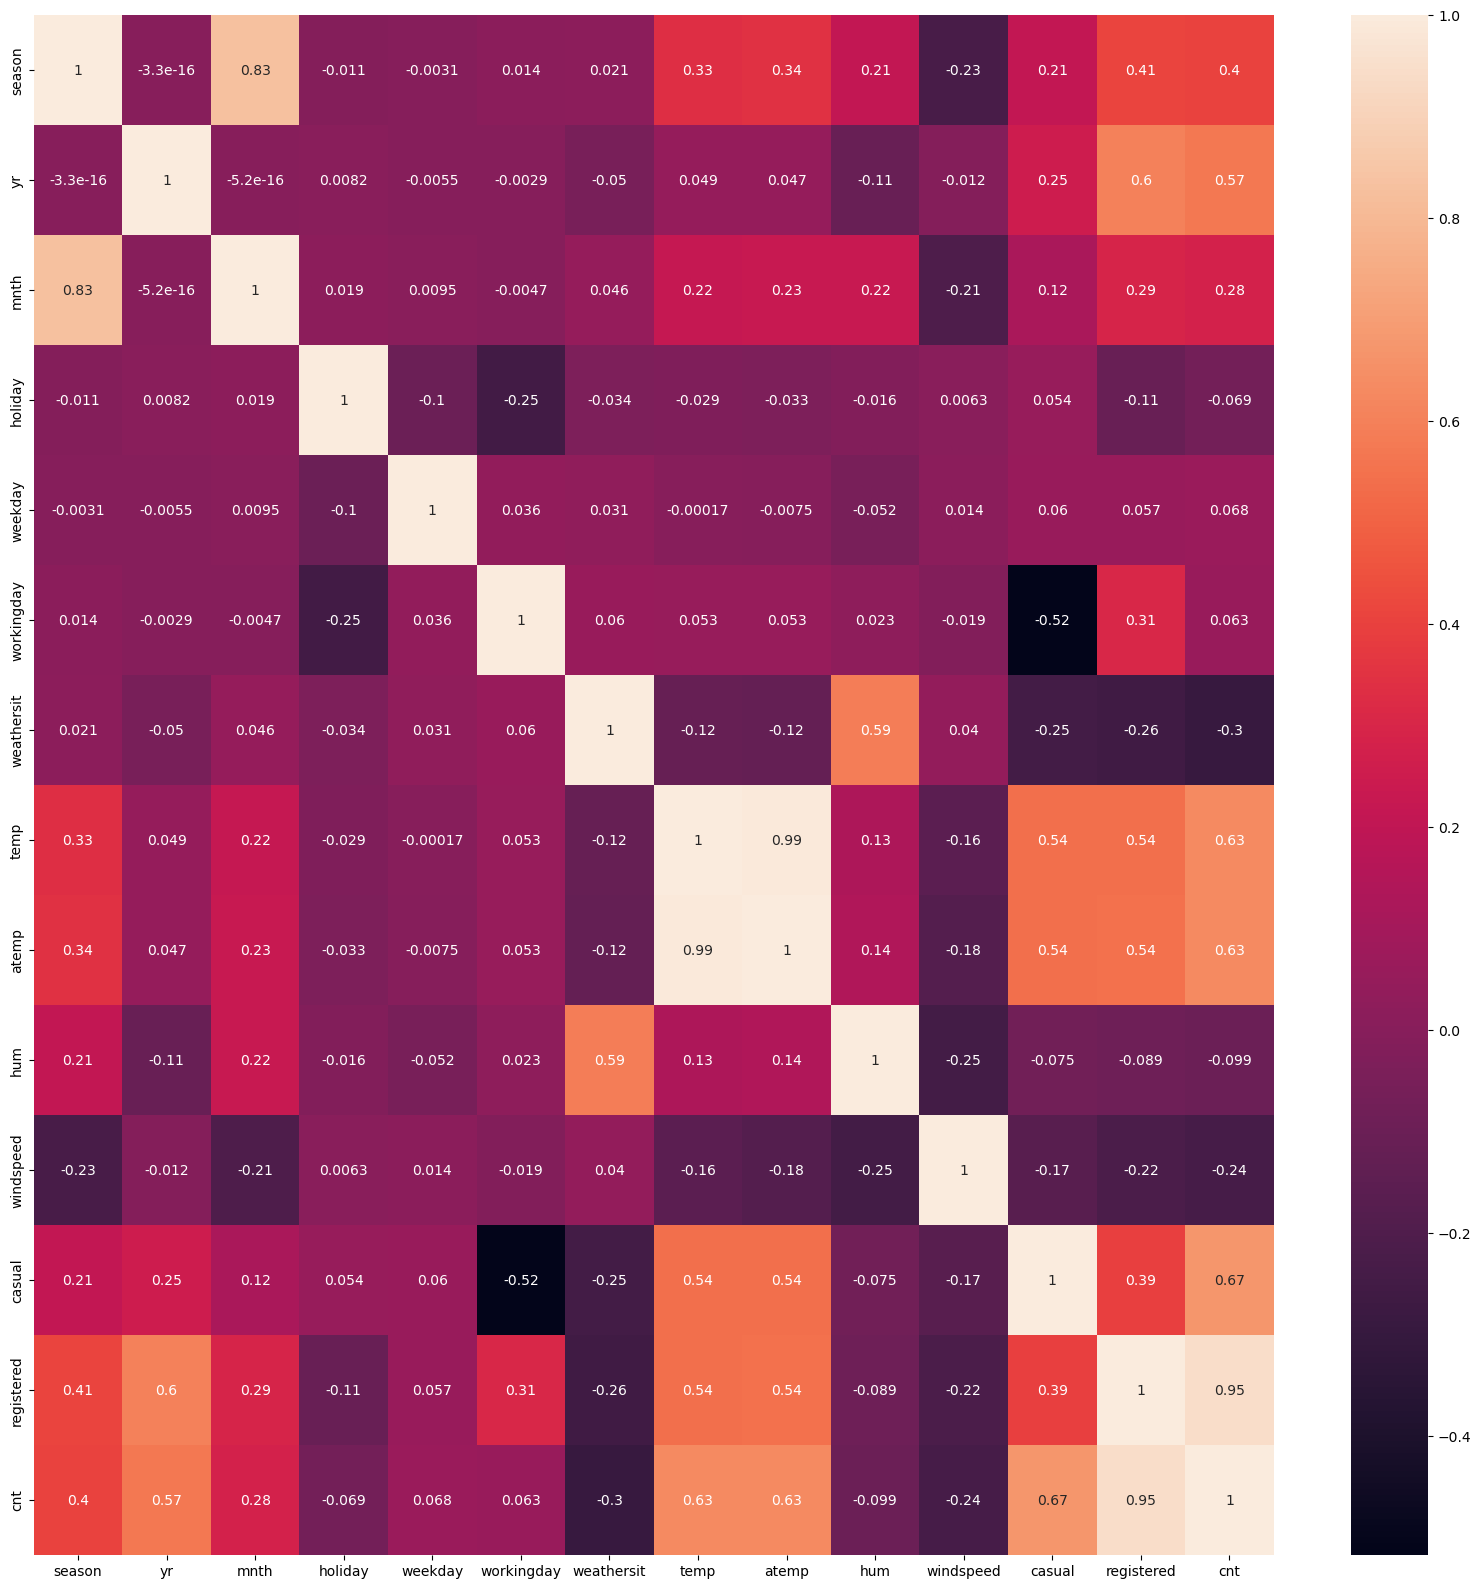

In [118]:
plt.figure(figsize=(20,20))
sns.heatmap(days.corr(),annot=True,)
plt.show()

## Observation : temp and atemp are highly Correlated we can drop one of those.

In [119]:
#atemp is highly correlated to temp , hence we can drop atemp column.

days.drop(['atemp'],axis=1,inplace=True)
days.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,82,1518,1600


# Dropping Extra Columns
    - dteday
    - casual
    - registered

In [120]:
days.drop(['dteday','casual','registered'],axis=1,inplace=True)
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [121]:
# mapping the season column

days.season = days.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [122]:
# mapping the Month column

days['mnth'] = days['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                               8:'August',9:'September',10:'October',11:'November',12:'December'})
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,January,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,January,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,3,1,1,9.305237,43.6957,12.522300,1600


In [123]:
# mapping the Weather column

days['weathersit'] = days['weathersit'].map({1:"Clear_Few_Clouds",2:"Mist_cloudy",
                                                           3:"Light_rain_snow_Thunderstorm",
                                                          4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'})
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,6,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,0,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,1,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,2,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,3,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,1600


In [124]:
# mapping the DayName column

days['weekday'] = days['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                                     4:"Thursday",5:"Friday",6:"Saturday"})
days.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,1600


In [125]:
# Dummy variable for month, weekday, weathersit and season variables.

months_days=pd.get_dummies(days.mnth,drop_first=True)
weekdays_days=pd.get_dummies(days.weekday,drop_first=True)
weathersit_days=pd.get_dummies(days.weathersit,drop_first=True)
seasons_days=pd.get_dummies(days.season,drop_first=True)

In [126]:
# Merging dummy variable dataset. 

days_new = pd.concat([days,months_days,weekdays_days,weathersit_days,seasons_days],axis=1)
days_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
0,spring,0,January,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,January,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,January,0,Monday,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Tuesday,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,January,0,Wednesday,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [127]:
# Dropping the 'season','mnth','weekday and 'weathersit'
days_new = days_new.drop(['season','mnth','weekday','weathersit'],axis=1)
days_new.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [128]:
days_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            730 non-null    int64  
 1   holiday                       730 non-null    int64  
 2   workingday                    730 non-null    int64  
 3   temp                          730 non-null    float64
 4   hum                           730 non-null    float64
 5   windspeed                     730 non-null    float64
 6   cnt                           730 non-null    int64  
 7   August                        730 non-null    uint8  
 8   December                      730 non-null    uint8  
 9   February                      730 non-null    uint8  
 10  January                       730 non-null    uint8  
 11  July                          730 non-null    uint8  
 12  June                          730 non-null    uint8  
 13  March

In [129]:
days_new.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849,0.084932,0.084932,0.076712,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647,0.278971,0.278971,0.266317,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 2 : Preparing the data for modelling (Train/Test Split , Scaling)

In [130]:
days_train, days_test = train_test_split(days_new,train_size=0.7,random_state=100)
print(days_train.shape)
print(days_test.shape)

(510, 29)
(220, 29)


In [131]:
# normalization b/w 0 and 1 : x-xmin/xmax-xmin
# Standardizon : x-mu/sigma

# Insatiate the obbject

scaler = MinMaxScaler()

#create a list of numberic vars
num_vars = ['cnt', 'temp', 'hum','windspeed']

# fit data
days_train[num_vars] = scaler.fit_transform(days_train[num_vars])
days_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Step 3 : Training and building the model  

In [132]:
days_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [133]:
# X_train,y_train

y_train = days_train.pop('cnt')
X_train = days_train

X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,August,December,February,January,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [134]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [135]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=14)
rfe = rfe.fit(X_train, y_train)

In [136]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 7),
 ('December', False, 4),
 ('February', False, 5),
 ('January', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('November', False, 3),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Light_rain_snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [137]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'September', 'Saturday', 'Light_rain_snow_Thunderstorm', 'Mist_cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')


In [138]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'January', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [139]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [140]:
#add constant

X_train_sm = sm.add_constant(X_train_rfe)

#create first Model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const                           0.240163
yr                              0.229763
holiday                        -0.059083
workingday                      0.043033
temp                            0.527708
hum                            -0.161086
windspeed                      -0.180875
July                           -0.054616
September                       0.081983
Saturday                        0.053031
Light_rain_snow_Thunderstorm   -0.245009
Mist_cloudy                    -0.056344
spring                         -0.055546
summer                          0.053733
winter                          0.099214
dtype: float64

In [141]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          2.11e-191
Time:                        22:52:12   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [142]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
11,spring,4.24
13,winter,3.42
12,summer,2.85
10,Mist_cloudy,2.29
0,yr,2.08
8,Saturday,1.97


In [143]:
# hum is having high VIF value so we are dropping it

X_train_new = X_train_rfe.drop(["hum"], axis = 1)

# Model 2

In [144]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2.astype(float)).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Mon, 08 Jan 2024   Prob (F-statistic):          1.28e-188
Time:                        22:52:12   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [145]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
10,spring,2.49
11,summer,2.34
0,yr,2.07
12,winter,1.98
7,Saturday,1.96
5,July,1.58
9,Mist_cloudy,1.57


# Step 4: Residual Analysis

In [146]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            510 non-null    int64  
 1   holiday                       510 non-null    int64  
 2   workingday                    510 non-null    int64  
 3   temp                          510 non-null    float64
 4   windspeed                     510 non-null    float64
 5   July                          510 non-null    uint8  
 6   September                     510 non-null    uint8  
 7   Saturday                      510 non-null    uint8  
 8   Light_rain_snow_Thunderstorm  510 non-null    uint8  
 9   Mist_cloudy                   510 non-null    uint8  
 10  spring                        510 non-null    uint8  
 11  summer                        510 non-null    uint8  
 12  winter                        510 non-null    uint8  
dtypes: 

In [147]:
X_train_new = sm.add_constant(X_train_new)

In [148]:
y_train_pred = lr_2.predict(X_train_new)

Text(0.5, 0, 'Errors')

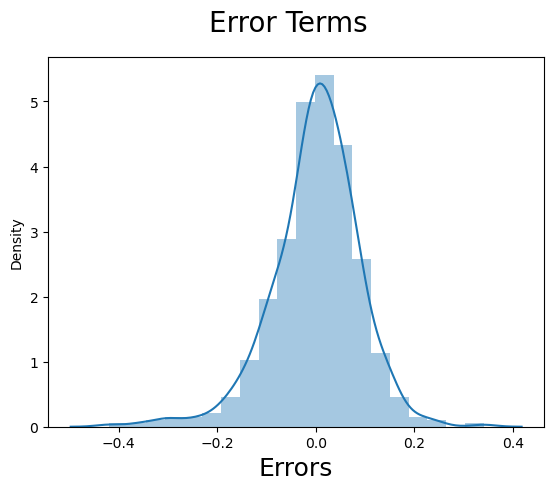

In [149]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Normal Distribution is being followed 

# Step 5 : Predictions and evauation on the test set

In [150]:
# Applying scaling on the test dataset

num_vars = ['cnt','temp', 'hum', 'windspeed']
days_test[num_vars] = scaler.transform(days_test[num_vars])
days_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rain_snow_Thunderstorm,Mist_cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [151]:
# X_train,y_train

y_test = days_test.pop('cnt')
X_test = days_test

In [152]:
X_train_new.drop('const',axis=1,inplace=True)
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_2 = sm.add_constant(X_test)
y_pred = lr_2.predict(X_test_lm_2)


r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8082

Text(0, 0.5, 'y_pred')

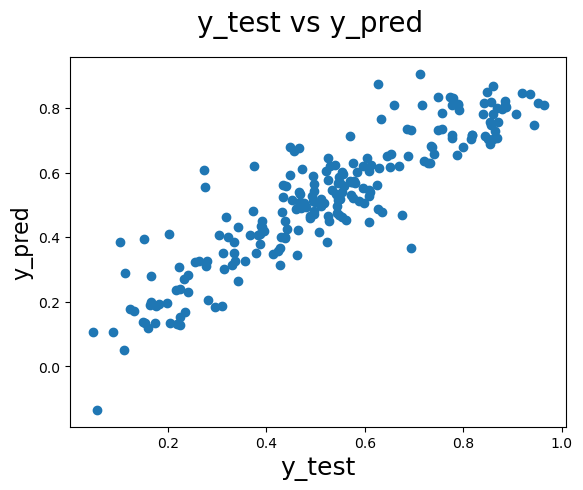

In [153]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [154]:
# adjusted r squre for test

adj_r_squared_train = 0.8303

r = X_test.shape[0]
c = X_test.shape[1]
adj_r_squared_test = 1-(((1-r2)*(r-1))/(r-c-1))
adj_r_squared_test*100

79.60786930933729

In [155]:
round(lr_2.params,4)

const                           0.1576
yr                              0.2337
holiday                        -0.0567
workingday                      0.0461
temp                            0.4915
windspeed                      -0.1491
July                           -0.0496
September                       0.0759
Saturday                        0.0579
Light_rain_snow_Thunderstorm   -0.2895
Mist_cloudy                    -0.0822
spring                         -0.0655
summer                          0.0477
winter                          0.0846
dtype: float64

# We can see that the equation of our best fitted line is:

### CNT = 0.1576+0.2337 x year −0.0567× holiday + 0.0461 x workingday+0.4915× temp −0.1491× windspeed - 0.0496x July + 0.0579 xSaturday +0.0759× September −0.2895× Light_snowrain −0.0822xMist_cloudy−0.0655× spring +0.0477× summer +0.0846× winter

# Demand of bikes depend on year, holiday, workingday, temp, windspeed, July, sep, Saturday , Light_snowrain, Mist_cloudy, spring, summer and winter.


### Company should focus on expanding business during Spring.

### There would be less bookings during Light_Rain_Snow . 

### Variables gathered are good indicators of business done my company. 